## Spam SMS Detection

Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import chardet
import wordcloud

### Loading Dataset

In [2]:
file_path = 'spam.csv'

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())

detect_encoding = result['encoding']
print(f'Detected Encoding: {detect_encoding}')

Detected Encoding: Windows-1252


In [3]:
data = pd.read_csv("spam.csv", encoding = detect_encoding)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning 

In [4]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.shape

(5572, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
data['target'] = encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
data.duplicated().sum()

403

We have to remove the duplicates

In [14]:
data = data.drop_duplicates(keep = 'first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

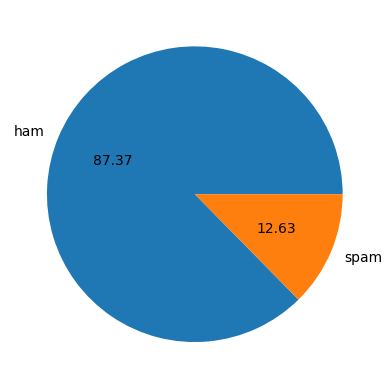

In [19]:
plt.pie(data['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

##### From above plot it can be seen that the data is so much imbalanced

In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
data.loc[:, 'num_char'] = data['text'].apply(len)

In [22]:
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
data.loc[:, 'num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
data

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
data.loc[:, 'num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
data

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
data[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
data[data['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
data[data['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Data Visualization

<Axes: xlabel='num_char', ylabel='Count'>

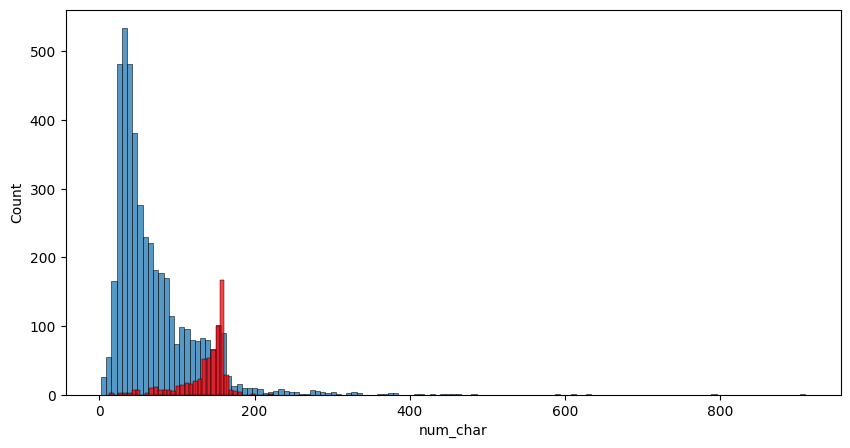

In [30]:
plt.figure(figsize = (10, 5))
sns.histplot(data[data['target'] == 0]['num_char'])
sns.histplot(data[data['target'] == 1]['num_char'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

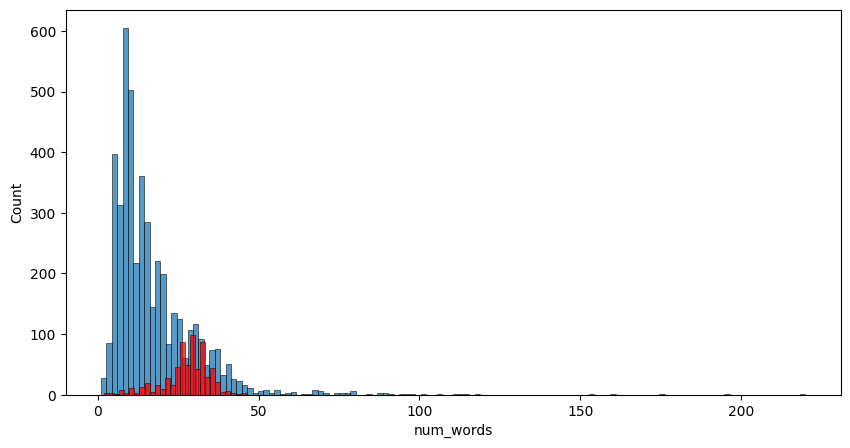

In [31]:
plt.figure(figsize = (10, 5))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

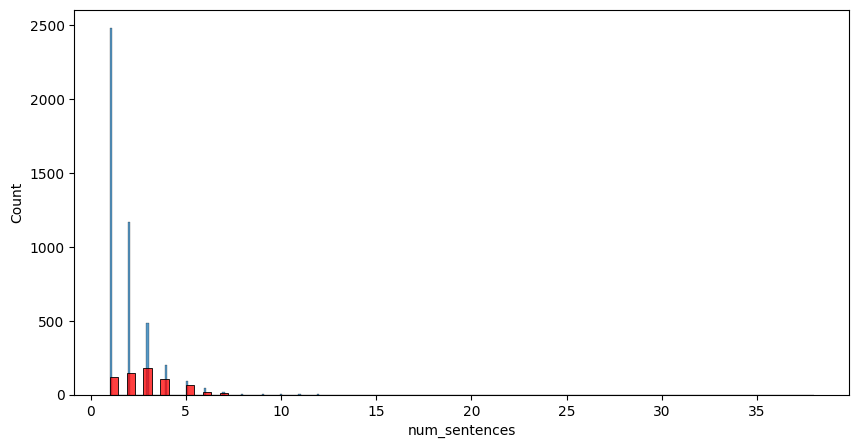

In [32]:
plt.figure(figsize = (10, 5))
sns.histplot(data[data['target'] == 0]['num_sentences'])
sns.histplot(data[data['target'] == 1]['num_sentences'], color = 'red')

C:\Users\acerKSG\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\acerKSG\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\acerKSG\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

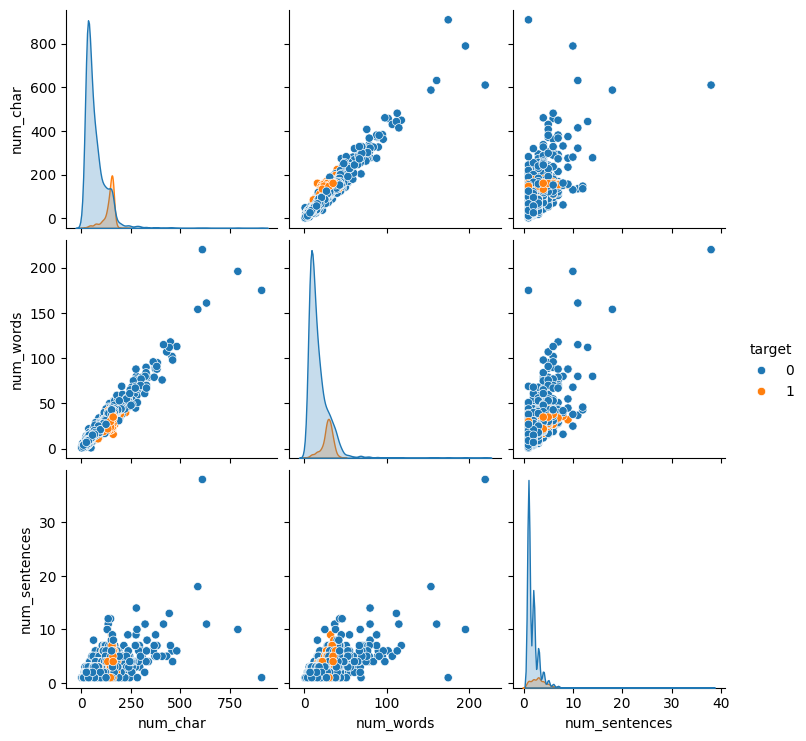

In [33]:
sns.pairplot(data, hue = 'target')

### Data Preprocessing

In [34]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [35]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
data.loc[:, 'transformed_text'] = data['text'].apply(transform_text)

In [44]:
data

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
wc

In [46]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))

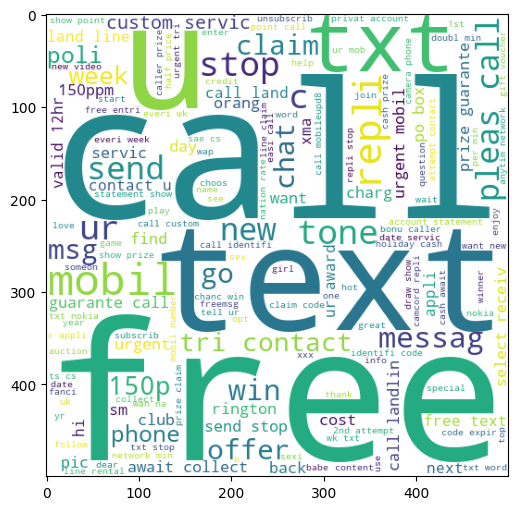

In [47]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep = " "))

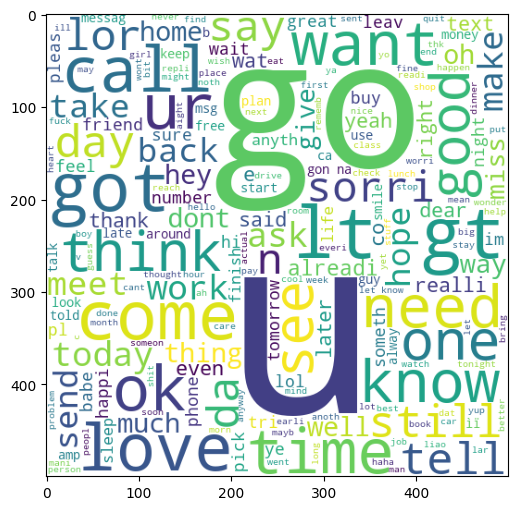

In [50]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [53]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

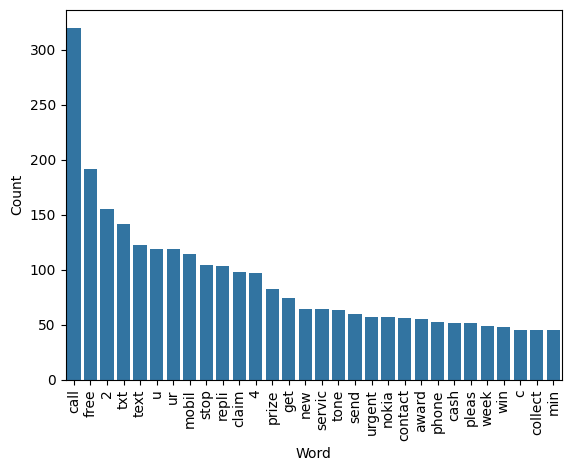

In [56]:
spam_counts = Counter(spam_corpus).most_common(30)
df_spam_counts = pd.DataFrame(spam_counts, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', y = 'Count', data = df_spam_counts)
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

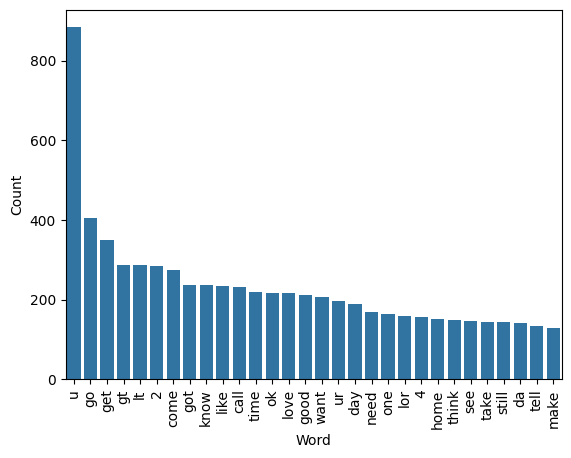

In [59]:
ham_counts = Counter(ham_corpus).most_common(30)
df_ham_count = pd.DataFrame(ham_counts, columns = ['Word', 'Count'])

sns.barplot(x = 'Word', y = 'Count', data = df_ham_count)
plt.xticks(rotation = 'vertical')
plt.show()

### Modelling

In [91]:
col = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine']

In [92]:
acc = []

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000)

In [63]:
X = tf.fit_transform(data['transformed_text']).toarray()

In [64]:
X.shape

(5169, 3000)

In [65]:
y = data['target'].values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#### 1. Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred_gnb = gnb.predict(X_test)

Accuracy (Naive Bayes):  0.8694390715667312


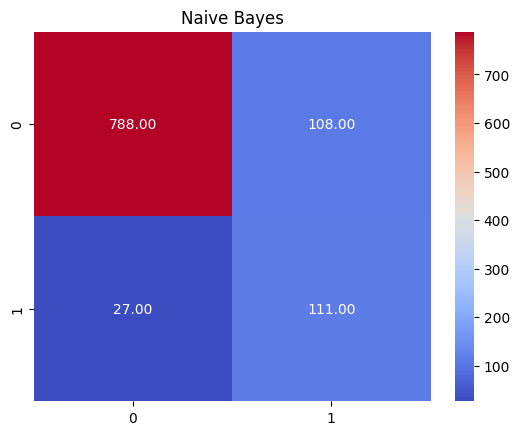

In [85]:
print("Accuracy (Naive Bayes): ", accuracy_score(y_test, y_pred_gnb))
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Naive Bayes")
plt.show()

In [93]:
acc.append(accuracy_score(y_test, y_pred_gnb))

#### 2. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr_classifier = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [81]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [82]:
y_pred_lr = lr_classifier.predict(X_test)

Accuracy (Logistic Regression):  0.9584139264990329


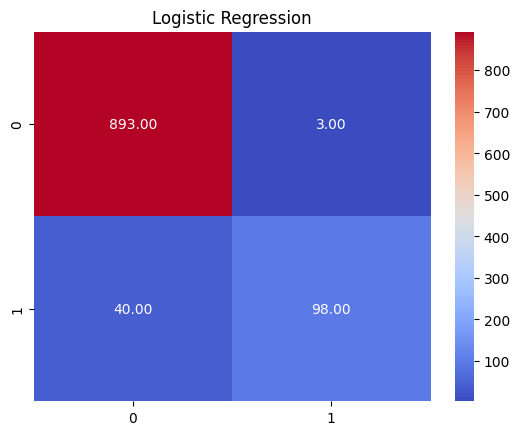

In [84]:
print("Accuracy (Logistic Regression): ", accuracy_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Logistic Regression")
plt.show()

In [94]:
acc.append(accuracy_score(y_test, y_pred_lr))

#### 3. Support Vector Machine

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)

In [88]:
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [89]:
y_pred_svc = svc.predict(X_test)

Accuracy (Support Vector Machine):  0.9758220502901354


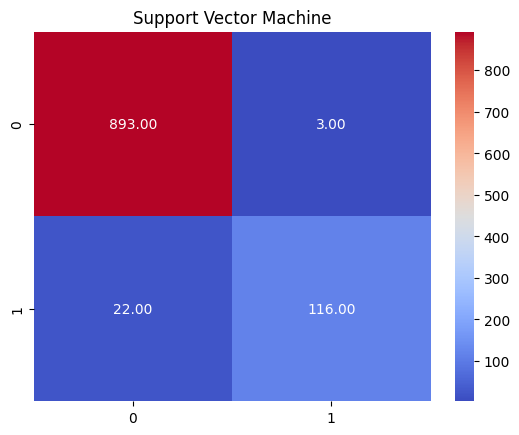

In [90]:
print("Accuracy (Support Vector Machine): ", accuracy_score(y_test, y_pred_svc))
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Support Vector Machine")
plt.show()

In [95]:
acc.append(accuracy_score(y_test, y_pred_svc))

### Visualizing results

In [96]:
acc

[0.8694390715667312, 0.9584139264990329, 0.9758220502901354]

In [98]:
FinalResult = pd.DataFrame({'Algorithms': col, 'Accuracy': acc})

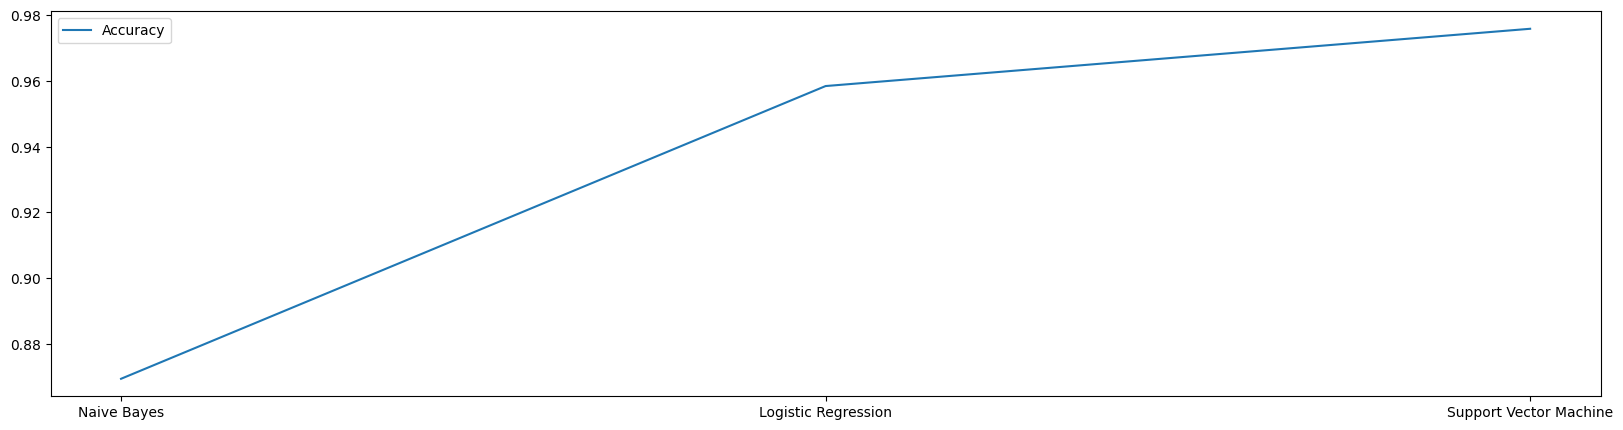

In [99]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(FinalResult.Algorithms, acc, label = 'Accuracy')
plt.legend()
plt.show()

## Support Vector Machine has better accuracy of 97.58%